In [ ]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
def min_max_scaler(data):
    numerator=data-np.min(data, axis=0)
    denominator=np.max(data,axis=0)-np.min(data, axis=0)
    return numerator/denominator#정규화(0~1사이의 값으로 변환)


In [ ]:
 #0.030,,0.090, 0.150 정규화한 값


In [ ]:
df=pd.read_csv('C:/workspace/AI/data/서울시_통합/air_seoul1.csv', encoding='CP949')
df

,Measured Date,NO2,PM25,CO,SO2,PM10,O3
0,20180101,0.055400,25.2,0.90,0.0052,47.622983,0.0040
1,20180102,0.019000,15.0,0.40,0.0046,25.200000,0.0182
2,20180103,0.023200,18.2,0.42,0.0040,33.600000,0.0178
3,20180104,0.052000,35.6,0.78,0.0052,60.200000,0.0024
4,20180105,0.050800,37.8,0.68,0.0050,54.400000,0.0056
...,...,...,...,...,...,...,...
1821,20221227,0.044400,26.6,0.70,0.0032,39.400000,0.0066
1822,20221228,0.024200,19.6,0.48,0.0032,35.000000,0.0174
1823,20221229,0.038800,26.0,0.50,0.0038,38.600000,0.0058
1824,20221230,0.024400,25.4,0.54,0.0032,37.400000,0.0234


In [ ]:
from sklearn.preprocessing import MinMaxScaler

df.drop('Measured Date', axis=1, inplace=True)
df.drop('PM25', axis=1, inplace=True)
df.drop('CO', axis=1, inplace=True)
df.drop('SO2', axis=1, inplace=True)
df.drop('NO2', axis=1, inplace=True)
df.drop('PM10', axis=1, inplace=True)

df

,O3
0,0.0040
1,0.0182
2,0.0178
3,0.0024
4,0.0056
...,...
1821,0.0066
1822,0.0174
1823,0.0058
1824,0.0234


In [ ]:
df= df.fillna(df.mean())

print(df)

          O3
0     0.0040
1     0.0182
2     0.0178
3     0.0024
4     0.0056
...      ...
1821  0.0066
1822  0.0174
1823  0.0058
1824  0.0234
1825  0.0024

[1826 rows x 1 columns]


In [ ]:
null_rows = df[df.isnull().any(axis=1)]
print(null_rows)

Empty DataFrame
Columns: [O3]
Index: []


In [ ]:
df = df.to_numpy()
df.size

1826

In [ ]:
test=df[::-1]
test

array([[0.0024],
       [0.0234],
       [0.0058],
       ...,
       [0.0178],
       [0.0182],
       [0.004 ]])

In [ ]:
seq_length=10
input_feature=1
train_size=int(len(df)*0.95)
train_input=df[0:train_size]
test_set=df[train_size-seq_length:]
print(train_input.size)
print(test_set.size)

1734
102


In [ ]:
print(train_input.shape, test_set.shape)

(1734, 1) (102, 1)


In [ ]:
train_set=min_max_scaler(train_input)
test_set=min_max_scaler(test_set)
print(train_set,test_set)


[[0.02948403]
 [0.2039312 ]
 [0.1990172 ]
 ...
 [0.49385749]
 [0.33415233]
 [0.36117936]] [[0.47826087]
 [0.58454106]
 [0.61352657]
 [0.52657005]
 [0.34299517]
 [0.57971014]
 [0.29468599]
 [0.96135266]
 [0.647343  ]
 [0.70048309]
 [0.86956522]
 [0.91304348]
 [0.57971014]
 [0.42995169]
 [0.2752987 ]
 [0.3236715 ]
 [0.42995169]
 [0.33816425]
 [0.62318841]
 [0.56521739]
 [0.45410628]
 [0.07246377]
 [0.18357488]
 [0.26086957]
 [0.2173913 ]
 [0.60869565]
 [0.46859903]
 [0.46859903]
 [0.06280193]
 [0.60869565]
 [0.57971014]
 [0.76328502]
 [0.71014493]
 [0.4057971 ]
 [0.1352657 ]
 [0.19806763]
 [0.30434783]
 [0.23188406]
 [0.10628019]
 [0.19806763]
 [0.48792271]
 [0.44927536]
 [0.14492754]
 [0.61352657]
 [0.47826087]
 [0.16908213]
 [0.26086957]
 [0.66183575]
 [0.2173913 ]
 [0.27536232]
 [0.14492754]
 [0.11111111]
 [0.68599034]
 [0.03864734]
 [0.69565217]
 [0.38647343]
 [0.0821256 ]
 [0.04830918]
 [0.08695652]
 [0.0821256 ]
 [0.1884058 ]
 [0.12560386]
 [0.02415459]
 [0.41545894]
 [0.03381643]


In [ ]:
def build_dataset(time_series,seq_length):
    dataX=[]
    dataY=[]
    for i in range(0,len(time_series)-seq_length):
        x=time_series[i:i+seq_length,:]
        y=time_series[i+seq_length,[-1]]
        print(x,'->',y)
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX),np.array(dataY)


In [ ]:
print(train_set)
trainX,trainY=build_dataset(train_set,seq_length)
testX,testY=build_dataset(test_set,seq_length)


[[0.02948403]
 [0.2039312 ]
 [0.1990172 ]
 ...
 [0.49385749]
 [0.33415233]
 [0.36117936]]
[[0.02948403]
 [0.2039312 ]
 [0.1990172 ]
 [0.00982801]
 [0.04914005]
 [0.04914005]
 [0.00737101]
 [0.32923833]
 [0.13513514]
 [0.25798526]] -> [0.23587224]
[[0.2039312 ]
 [0.1990172 ]
 [0.00982801]
 [0.04914005]
 [0.04914005]
 [0.00737101]
 [0.32923833]
 [0.13513514]
 [0.25798526]
 [0.23587224]] -> [0.02211302]
[[0.1990172 ]
 [0.00982801]
 [0.04914005]
 [0.04914005]
 [0.00737101]
 [0.32923833]
 [0.13513514]
 [0.25798526]
 [0.23587224]
 [0.02211302]] -> [0.004914]
[[0.00982801]
 [0.04914005]
 [0.04914005]
 [0.00737101]
 [0.32923833]
 [0.13513514]
 [0.25798526]
 [0.23587224]
 [0.02211302]
 [0.004914  ]] -> [0.01474201]
[[0.04914005]
 [0.04914005]
 [0.00737101]
 [0.32923833]
 [0.13513514]
 [0.25798526]
 [0.23587224]
 [0.02211302]
 [0.004914  ]
 [0.01474201]] -> [0.00982801]
[[0.04914005]
 [0.00737101]
 [0.32923833]
 [0.13513514]
 [0.25798526]
 [0.23587224]
 [0.02211302]
 [0.004914  ]
 [0.01474201]
 

In [ ]:
print(trainX.shape,trainY.shape)
print(testX.shape,testY.shape)
print(testX)

(1724, 10, 1) (1724, 1)
(92, 10, 1) (92, 1)
[[[0.47826087]
  [0.58454106]
  [0.61352657]
  [0.52657005]
  [0.34299517]
  [0.57971014]
  [0.29468599]
  [0.96135266]
  [0.647343  ]
  [0.70048309]]

 [[0.58454106]
  [0.61352657]
  [0.52657005]
  [0.34299517]
  [0.57971014]
  [0.29468599]
  [0.96135266]
  [0.647343  ]
  [0.70048309]
  [0.86956522]]

 [[0.61352657]
  [0.52657005]
  [0.34299517]
  [0.57971014]
  [0.29468599]
  [0.96135266]
  [0.647343  ]
  [0.70048309]
  [0.86956522]
  [0.91304348]]

 [[0.52657005]
  [0.34299517]
  [0.57971014]
  [0.29468599]
  [0.96135266]
  [0.647343  ]
  [0.70048309]
  [0.86956522]
  [0.91304348]
  [0.57971014]]

 [[0.34299517]
  [0.57971014]
  [0.29468599]
  [0.96135266]
  [0.647343  ]
  [0.70048309]
  [0.86956522]
  [0.91304348]
  [0.57971014]
  [0.42995169]]

 [[0.57971014]
  [0.29468599]
  [0.96135266]
  [0.647343  ]
  [0.70048309]
  [0.86956522]
  [0.91304348]
  [0.57971014]
  [0.42995169]
  [0.2752987 ]]

 [[0.29468599]
  [0.96135266]
  [0.647343  ]

In [ ]:
model=keras.Sequential()
model.add(keras.layers.LSTM(units=128, input_shape=(seq_length, input_feature), return_sequences=True))
model.add(keras.layers.LSTM(64, return_sequences=True))
model.add(keras.layers.LSTM(32, return_sequences=True))
model.add(keras.layers.LSTM(16, return_sequences=True))
model.add(keras.layers.LSTM(8, return_sequences=True))
model.add(keras.layers.LSTM(1, return_sequences=False))
model.add(keras.layers.Dense(4))
model.summary()


Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_117 (LSTM)             (None, 10, 128)           66560     
                                                                 
 lstm_118 (LSTM)             (None, 10, 64)            49408     
                                                                 
 lstm_119 (LSTM)             (None, 10, 32)            12416     
                                                                 
 lstm_120 (LSTM)             (None, 10, 16)            3136      
                                                                 
 lstm_121 (LSTM)             (None, 10, 8)             800       
                                                                 
 lstm_122 (LSTM)             (None, 1)                 40        
                                                                 
 dense_21 (Dense)            (None, 4)               

In [ ]:
model.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=0.01))#,metrics='accuracy'
loss = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=200)

Epoch 1/200
54/54 [==============================] - 16s 72ms/step - loss: 0.0364 - val_loss: 0.0661
Epoch 2/200
54/54 [==============================] - 1s 24ms/step - loss: 0.0241 - val_loss: 0.0645
Epoch 3/200
54/54 [==============================] - 1s 24ms/step - loss: 0.0223 - val_loss: 0.0641
Epoch 4/200
54/54 [==============================] - 1s 24ms/step - loss: 0.0201 - val_loss: 0.0622
Epoch 5/200
54/54 [==============================] - 1s 24ms/step - loss: 0.0181 - val_loss: 0.0595
Epoch 6/200
54/54 [==============================] - 1s 24ms/step - loss: 0.0173 - val_loss: 0.0595
Epoch 7/200
54/54 [==============================] - 1s 24ms/step - loss: 0.0179 - val_loss: 0.0585
Epoch 8/200
54/54 [==============================] - 1s 24ms/step - loss: 0.0173 - val_loss: 0.0573
Epoch 9/200
54/54 [==============================] - 1s 24ms/step - loss: 0.0170 - val_loss: 0.0554
Epoch 10/200
54/54 [==============================] - 1s 23ms/step - loss: 0.0175 - val_loss: 0.059

54/54 [==============================] - 1s 24ms/step - loss: 0.0062 - val_loss: 0.0688
Epoch 83/200
54/54 [==============================] - 1s 24ms/step - loss: 0.0057 - val_loss: 0.0673
Epoch 84/200
54/54 [==============================] - 1s 24ms/step - loss: 0.0059 - val_loss: 0.0720
Epoch 85/200
54/54 [==============================] - 1s 25ms/step - loss: 0.0060 - val_loss: 0.0641
Epoch 86/200
54/54 [==============================] - 1s 24ms/step - loss: 0.0056 - val_loss: 0.0629
Epoch 87/200
54/54 [==============================] - 1s 24ms/step - loss: 0.0055 - val_loss: 0.0674
Epoch 88/200
54/54 [==============================] - 1s 24ms/step - loss: 0.0054 - val_loss: 0.0640
Epoch 89/200
54/54 [==============================] - 1s 24ms/step - loss: 0.0046 - val_loss: 0.0656
Epoch 90/200
54/54 [==============================] - 1s 24ms/step - loss: 0.0041 - val_loss: 0.0677
Epoch 91/200
54/54 [==============================] - 1s 24ms/step - loss: 0.0040 - val_loss: 0.0669
Epo

54/54 [==============================] - 2s 27ms/step - loss: 0.0024 - val_loss: 0.0627
Epoch 163/200
54/54 [==============================] - 1s 27ms/step - loss: 0.0018 - val_loss: 0.0629
Epoch 164/200
54/54 [==============================] - 1s 28ms/step - loss: 0.0013 - val_loss: 0.0622
Epoch 165/200
54/54 [==============================] - 1s 27ms/step - loss: 0.0017 - val_loss: 0.0675
Epoch 166/200
54/54 [==============================] - 1s 26ms/step - loss: 0.0013 - val_loss: 0.0645
Epoch 167/200
54/54 [==============================] - 1s 25ms/step - loss: 8.8107e-04 - val_loss: 0.0634
Epoch 168/200
54/54 [==============================] - 1s 27ms/step - loss: 7.1507e-04 - val_loss: 0.0634
Epoch 169/200
54/54 [==============================] - 1s 25ms/step - loss: 6.2984e-04 - val_loss: 0.0641
Epoch 170/200
54/54 [==============================] - 1s 25ms/step - loss: 6.5090e-04 - val_loss: 0.0664
Epoch 171/200
54/54 [==============================] - 1s 27ms/step - loss: 7.66

In [ ]:
test_predict=model.predict(testX)
print(testY.shape,test_predict.shape)

3/3 [==============================] - 2s 8ms/step
(92, 1) (92, 4)


In [ ]:
# Assuming you have the predicted values stored in 'test_predict' and actual values in 'testY'
#np.max(data,axis=0)-np.min(data, axis=0)
# Print predicted and actual values
for pred, actual in zip(test_predict, testY):
    print("예측값:", pred, "실제값:", actual)
    pred = pred * (np.max(df,axis=0) -np.min(df, axis=0)) +np.min(df, axis=0)
    if pred <= 0.030:
        print("평가: 좋음", pred)
    elif pred <= 0.090:
        print("평가: 보통")
    elif pred <= 0.150:
        print("평가: 나쁨")
    else:
        print("평가: 매우나쁨")


예측값: [0.46188658 0.46188658] 실제값: [0.86956522]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
# Print predicted and actual values
for pred, actual in zip(test_predict, testY):
    print("예측값:", pred, "실제값:", actual)
    pred_scalar = pred[0] * (np.max(df,axis=0) - np.min(df, axis=0)) + np.min(df, axis=0)
    if pred_scalar <= 0.030:
        print("평가: 좋음", pred_scalar)
    elif pred_scalar <= 0.090:
        print("평가: 보통")
    elif pred_scalar <= 0.150:
        print("평가: 나쁨")
    else:
        print("평가: 매우나쁨")

예측값: [0.30896756 0.3089676  0.30896756 0.3089676 ] 실제값: [0.86956522]
평가: 좋음 [0.02674996]
예측값: [0.70342165 0.7034217  0.70342165 0.7034217 ] 실제값: [0.91304348]
평가: 보통
예측값: [0.7225233  0.72252333 0.7225233  0.72252333] 실제값: [0.57971014]
평가: 보통
예측값: [0.38744318 0.38744318 0.38744318 0.38744318] 실제값: [0.42995169]
평가: 보통
예측값: [0.42311722 0.42311725 0.42311722 0.42311725] 실제값: [0.2752987]
평가: 보통
예측값: [0.44736212 0.44736212 0.44736212 0.44736212] 실제값: [0.3236715]
평가: 보통
예측값: [0.35383308 0.35383314 0.35383308 0.35383314] 실제값: [0.42995169]
평가: 보통
예측값: [0.332401   0.33240104 0.332401   0.33240104] 실제값: [0.33816425]
평가: 좋음 [0.02865744]
예측값: [0.4797275 0.4797275 0.4797275 0.4797275] 실제값: [0.62318841]
평가: 보통
예측값: [0.429959   0.42995903 0.429959   0.42995903] 실제값: [0.56521739]
평가: 보통
예측값: [0.49134296 0.49134302 0.49134296 0.49134302] 실제값: [0.45410628]
평가: 보통
예측값: [0.4162323  0.41623235 0.4162323  0.41623235] 실제값: [0.07246377]
평가: 보통
예측값: [0.32300502 0.32300505 0.32300502 0.32300505] 실제값: [0.18357488]

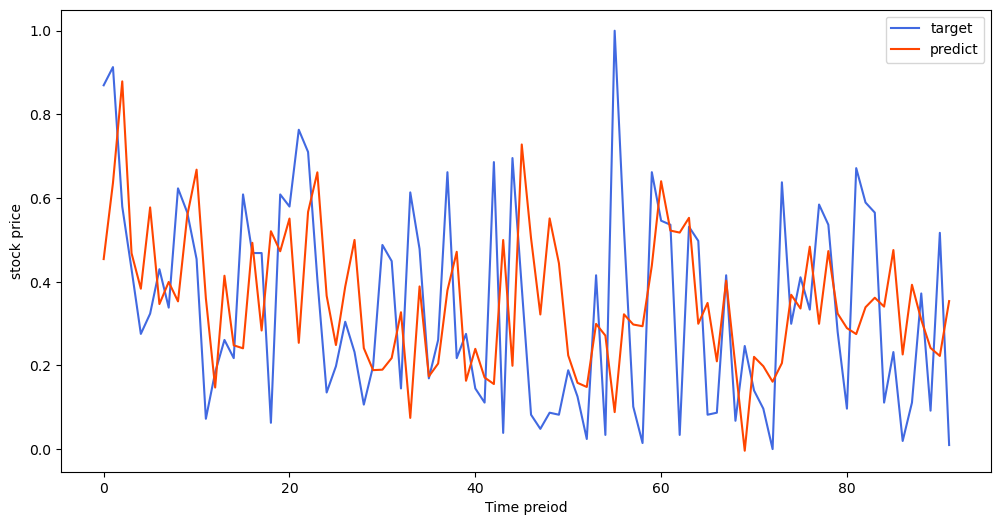

RMSE: 0.2626269736415978
MAE: 0.2092470090789839
R-squared: -0.1877079639277437


In [ ]:
import os # LSTM layer 갯수 조절 - 2개 / 200번 러닝 / 뉴런 64개
os.environ['KMP_DUPLICATE_LIB_OK']='True'
plt.figure(figsize=(12, 6))  # 그래프 크기 조정
plt.plot(testY,'#4169E1')
plt.plot(test_predict,'#FF4500')
plt.xlabel('Time preiod')
plt.ylabel('stock price')
plt.legend(['target','predict'])
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 예측 성능 평가
rmse = np.sqrt(mean_squared_error(testY, test_predict))
mae = mean_absolute_error(testY, test_predict)
r2 = r2_score(testY, test_predict)

# 결과 출력
print('RMSE:', rmse)
print('MAE:', mae)
print('R-squared:', r2)

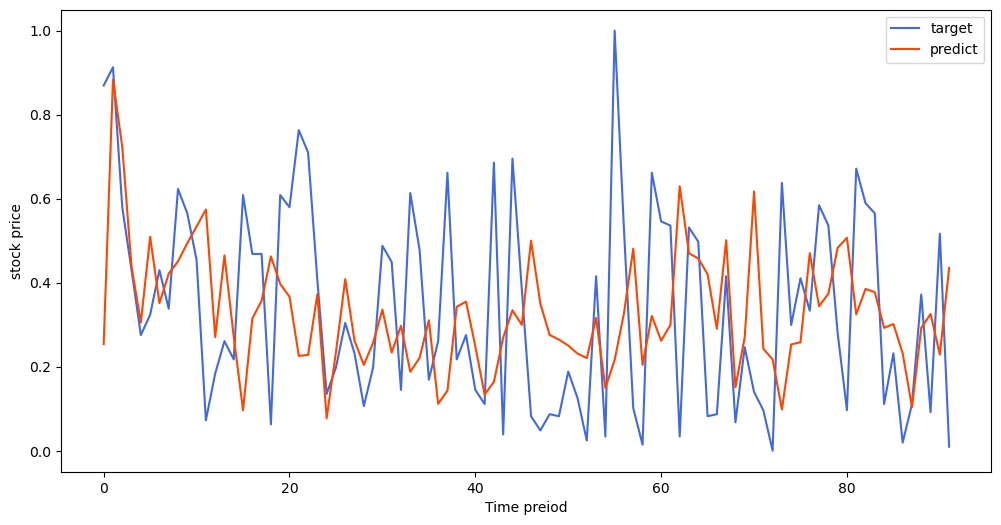

RMSE: 0.2678914587936372
MAE: 0.21100818180896663
R-squared: -0.23580157567945514


In [ ]:
import os # LSTM layer 갯수 조절 - 4개 / 200번 러닝 / 뉴런 64개 / dense 1
os.environ['KMP_DUPLICATE_LIB_OK']='True'
plt.figure(figsize=(12, 6))  # 그래프 크기 조정
plt.plot(testY,'#4169E1')
plt.plot(test_predict,'#FF4500')
plt.xlabel('Time preiod')
plt.ylabel('stock price')
plt.legend(['target','predict'])
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 예측 성능 평가
rmse = np.sqrt(mean_squared_error(testY, test_predict))
mae = mean_absolute_error(testY, test_predict)
r2 = r2_score(testY, test_predict)

# 결과 출력
print('RMSE:', rmse)
print('MAE:', mae)
print('R-squared:', r2)

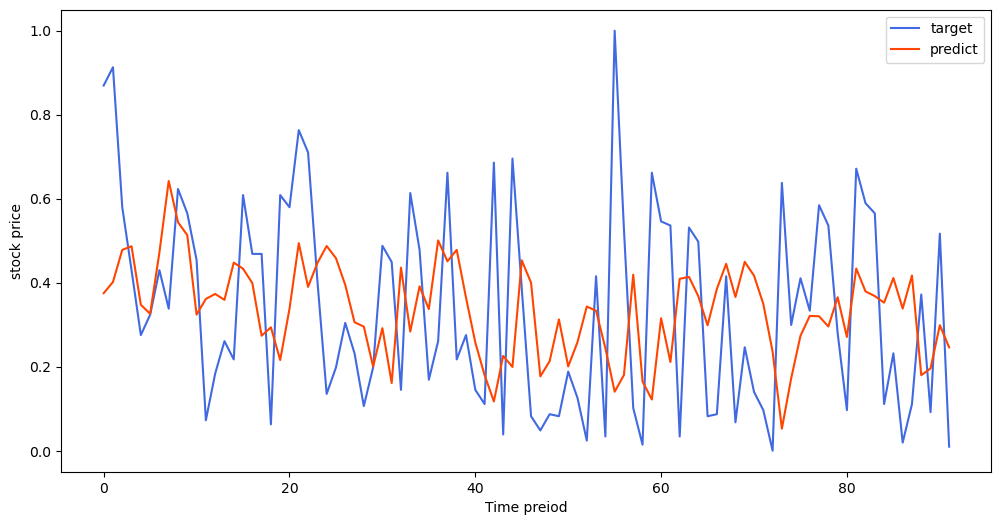

RMSE: 0.26135027082413514
MAE: 0.2179382147006815
R-squared: -0.17618847388496794


In [ ]:
import os # LSTM layer 갯수 조절 - 6개 / 200번 러닝 / 뉴런 64개 / dense 1
os.environ['KMP_DUPLICATE_LIB_OK']='True'
plt.figure(figsize=(12, 6))  # 그래프 크기 조정
plt.plot(testY,'#4169E1')
plt.plot(test_predict,'#FF4500')
plt.xlabel('Time preiod')
plt.ylabel('stock price')
plt.legend(['target','predict'])
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 예측 성능 평가
rmse = np.sqrt(mean_squared_error(testY, test_predict))
mae = mean_absolute_error(testY, test_predict)
r2 = r2_score(testY, test_predict)

# 결과 출력
print('RMSE:', rmse)
print('MAE:', mae)
print('R-squared:', r2)

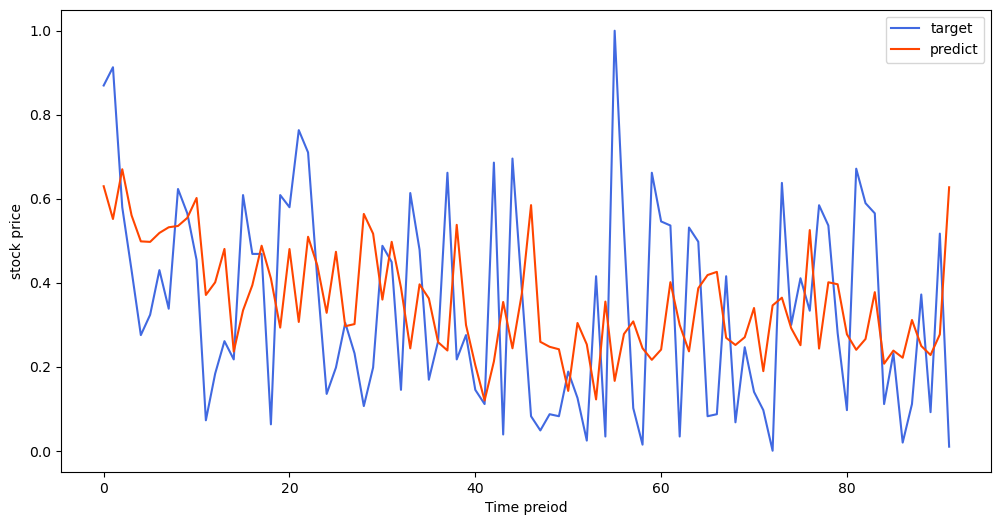

RMSE: 0.2602341190357061
MAE: 0.21323927329600748
R-squared: -0.16616360145116338


In [ ]:
import os # LSTM layer 갯수 조절 - 7개 / 200번 러닝 / 뉴런 64개 / dense 1
os.environ['KMP_DUPLICATE_LIB_OK']='True'
plt.figure(figsize=(12, 6))  # 그래프 크기 조정
plt.plot(testY,'#4169E1')
plt.plot(test_predict,'#FF4500')
plt.xlabel('Time preiod')
plt.ylabel('stock price')
plt.legend(['target','predict'])
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 예측 성능 평가
rmse = np.sqrt(mean_squared_error(testY, test_predict))
mae = mean_absolute_error(testY, test_predict)
r2 = r2_score(testY, test_predict)

# 결과 출력
print('RMSE:', rmse)
print('MAE:', mae)
print('R-squared:', r2)

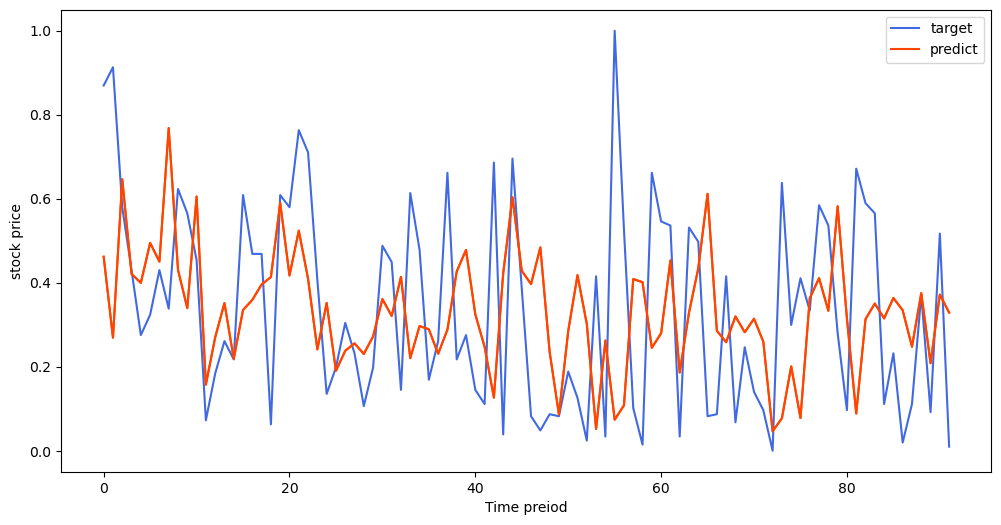

RMSE: 0.26877052221291403
MAE: 0.21352773610027448
R-squared: -0.24392524146226258


In [ ]:
import os # LSTM layer 갯수 조절 - 6개 / 200번 러닝 / 뉴런 64개 / dense 2
os.environ['KMP_DUPLICATE_LIB_OK']='True'
plt.figure(figsize=(12, 6))  # 그래프 크기 조정
plt.plot(testY,'#4169E1')
plt.plot(test_predict,'#FF4500')
plt.xlabel('Time preiod')
plt.ylabel('stock price')
plt.legend(['target','predict'])
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 예측 성능 평가
rmse = np.sqrt(mean_squared_error(testY, test_predict[:, 1]))  # 수정된 부분
mae = mean_absolute_error(testY, test_predict[:, 1])  # 수정된 부분
r2 = r2_score(testY, test_predict[:, 1])  # 수정된 부분

# 결과 출력
print('RMSE:', rmse)
print('MAE:', mae)
print('R-squared:', r2)

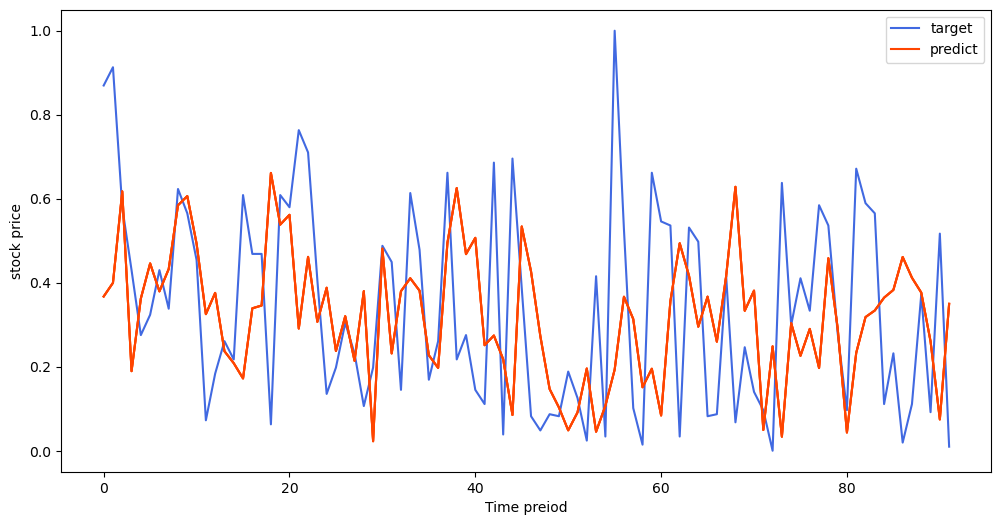

RMSE: 0.2736466724033748
MAE: 0.21096696852725264
R-squared: -0.28947032807752615


In [ ]:
import os # LSTM layer 갯수 조절 - 6개 / 200번 러닝 / 뉴런 64개 / dense 3
os.environ['KMP_DUPLICATE_LIB_OK']='True'
plt.figure(figsize=(12, 6))  # 그래프 크기 조정
plt.plot(testY,'#4169E1')
plt.plot(test_predict,'#FF4500')
plt.xlabel('Time preiod')
plt.ylabel('stock price')
plt.legend(['target','predict'])
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 예측 성능 평가
rmse = np.sqrt(mean_squared_error(testY, test_predict[:, 1]))  # 수정된 부분
mae = mean_absolute_error(testY, test_predict[:, 1])  # 수정된 부분
r2 = r2_score(testY, test_predict[:, 1])  # 수정된 부분

# 결과 출력
print('RMSE:', rmse)
print('MAE:', mae)
print('R-squared:', r2)

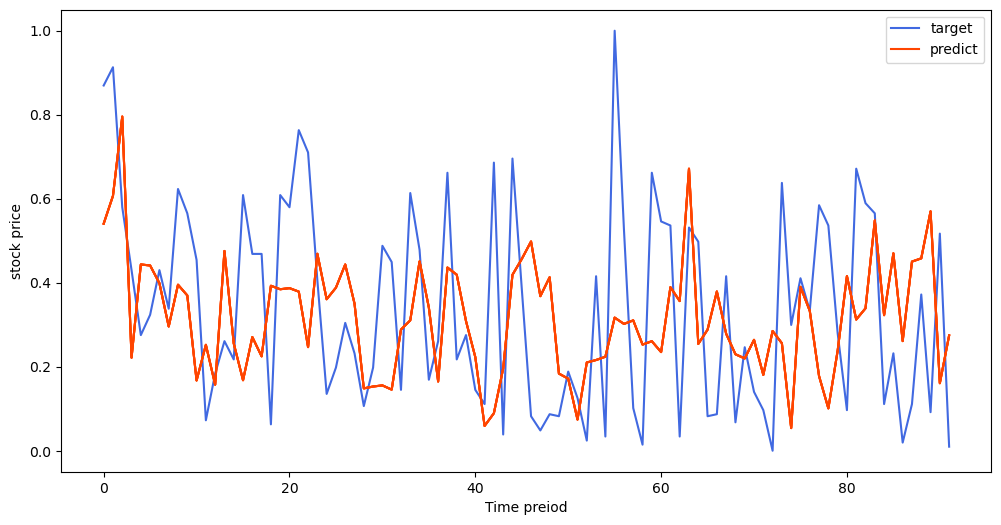

RMSE: 0.25357259767883544
MAE: 0.2140776465084052
R-squared: -0.10722440479543871


In [ ]:
import os # LSTM layer 갯수 조절 - 6개 / 200번 러닝 / 뉴런 64개 / dense 4
os.environ['KMP_DUPLICATE_LIB_OK']='True'
plt.figure(figsize=(12, 6))  # 그래프 크기 조정
plt.plot(testY,'#4169E1')
plt.plot(test_predict,'#FF4500')
plt.xlabel('Time preiod')
plt.ylabel('stock price')
plt.legend(['target','predict'])
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 예측 성능 평가
rmse = np.sqrt(mean_squared_error(testY, test_predict[:, 1]))  # 수정된 부분
mae = mean_absolute_error(testY, test_predict[:, 1])  # 수정된 부분
r2 = r2_score(testY, test_predict[:, 1])  # 수정된 부분

# 결과 출력
print('RMSE:', rmse)
print('MAE:', mae)
print('R-squared:', r2)

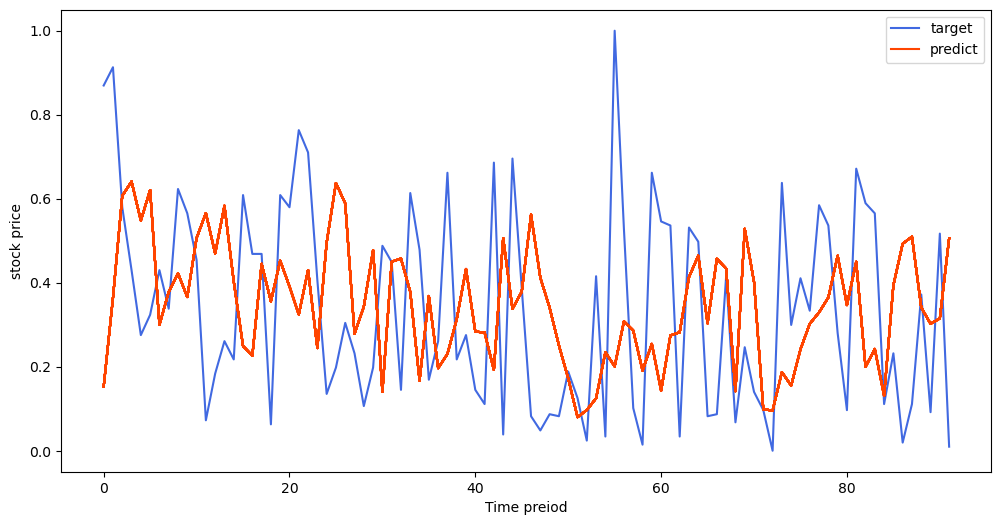

RMSE: 0.28905714239825714
MAE: 0.24149125755654718
R-squared: -0.43879334433424444


In [ ]:
import os # LSTM layer 갯수 조절 - 6개 / 200번 러닝 / 뉴런 64개 / dense 32
os.environ['KMP_DUPLICATE_LIB_OK']='True'
plt.figure(figsize=(12, 6))  # 그래프 크기 조정
plt.plot(testY,'#4169E1')
plt.plot(test_predict,'#FF4500')
plt.xlabel('Time preiod')
plt.ylabel('stock price')
plt.legend(['target','predict'])
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 예측 성능 평가
rmse = np.sqrt(mean_squared_error(testY, test_predict[:, 1]))  # 수정된 부분
mae = mean_absolute_error(testY, test_predict[:, 1])  # 수정된 부분
r2 = r2_score(testY, test_predict[:, 1])  # 수정된 부분

# 결과 출력
print('RMSE:', rmse)
print('MAE:', mae)
print('R-squared:', r2)

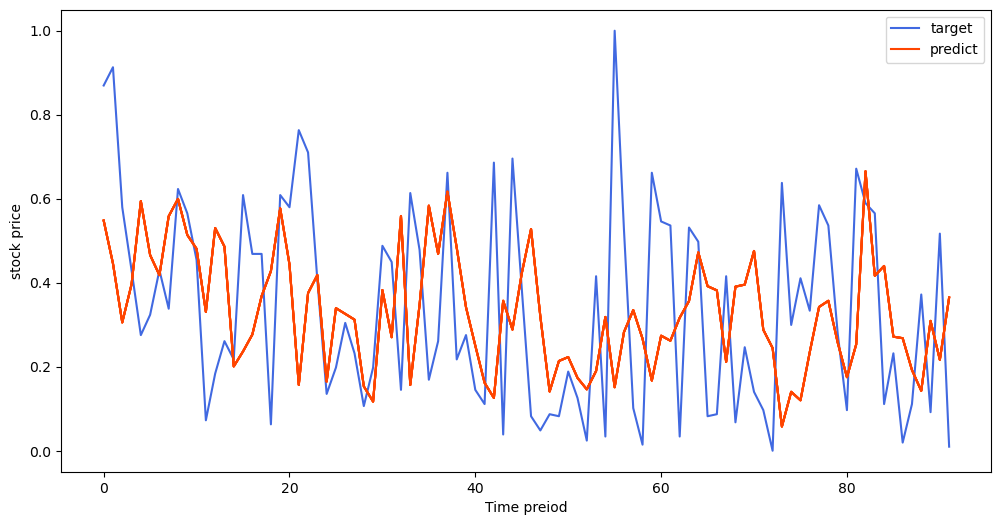

RMSE: 0.2688726606290842
MAE: 0.21651524024654933
R-squared: -0.24487085628835126


In [ ]:
import os # LSTM layer 갯수 조절 - 6개 / 200번 러닝 / 뉴런 64개 / dense 5
os.environ['KMP_DUPLICATE_LIB_OK']='True'
plt.figure(figsize=(12, 6))  # 그래프 크기 조정
plt.plot(testY,'#4169E1')
plt.plot(test_predict,'#FF4500')
plt.xlabel('Time preiod')
plt.ylabel('stock price')
plt.legend(['target','predict'])
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 예측 성능 평가
rmse = np.sqrt(mean_squared_error(testY, test_predict[:, 1]))  # 수정된 부분
mae = mean_absolute_error(testY, test_predict[:, 1])  # 수정된 부분
r2 = r2_score(testY, test_predict[:, 1])  # 수정된 부분

# 결과 출력
print('RMSE:', rmse)
print('MAE:', mae)
print('R-squared:', r2)

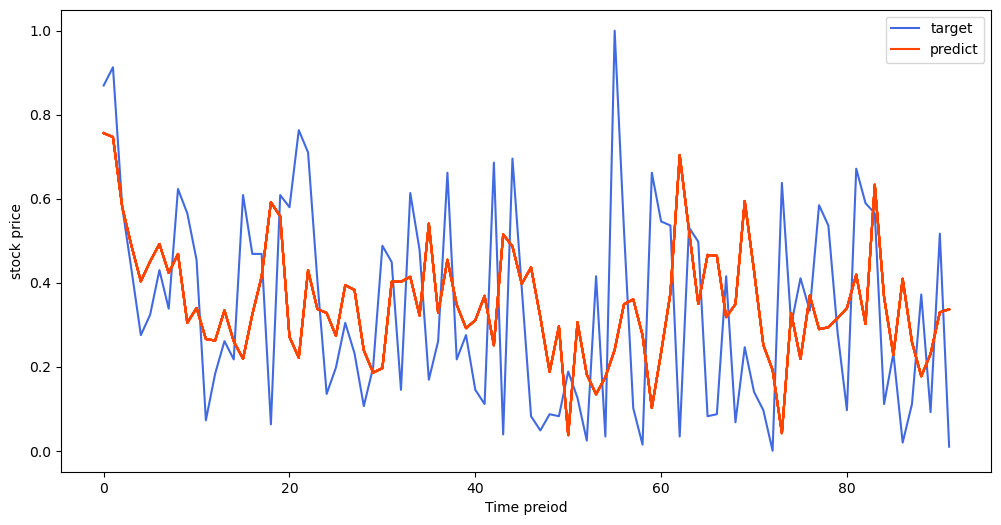

RMSE: 0.25871185930482554
MAE: 0.20855987792772354
R-squared: -0.15256037524842614


In [ ]:
import os # LSTM layer 갯수 조절 - 6개 / 200번 러닝 / 뉴런 64개 / dense 4
os.environ['KMP_DUPLICATE_LIB_OK']='True'
plt.figure(figsize=(12, 6))  # 그래프 크기 조정
plt.plot(testY,'#4169E1')
plt.plot(test_predict,'#FF4500')
plt.xlabel('Time preiod')
plt.ylabel('stock price')
plt.legend(['target','predict'])
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 예측 성능 평가
rmse = np.sqrt(mean_squared_error(testY, test_predict[:, 1]))  # 수정된 부분
mae = mean_absolute_error(testY, test_predict[:, 1])  # 수정된 부분
r2 = r2_score(testY, test_predict[:, 1])  # 수정된 부분

# 결과 출력
print('RMSE:', rmse)
print('MAE:', mae)
print('R-squared:', r2)

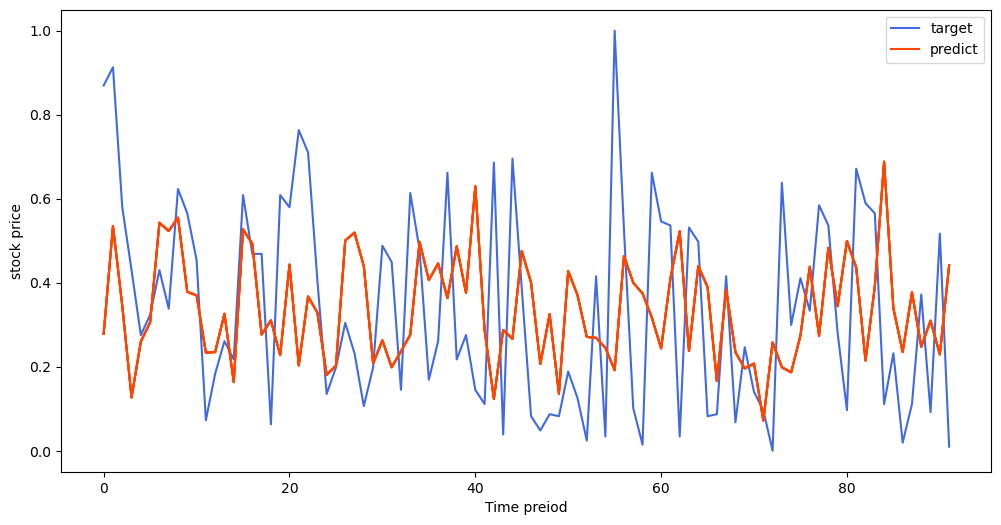

RMSE: 0.2684554820293155
MAE: 0.21798317236472634
R-squared: -0.24101080904764838


In [ ]:
import os # LSTM layer 갯수 조절 - 7개 / 200번 러닝 / 뉴런 64개 / dense 4
os.environ['KMP_DUPLICATE_LIB_OK']='True'
plt.figure(figsize=(12, 6))  # 그래프 크기 조정
plt.plot(testY,'#4169E1')
plt.plot(test_predict,'#FF4500')
plt.xlabel('Time preiod')
plt.ylabel('stock price')
plt.legend(['target','predict'])
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 예측 성능 평가
rmse = np.sqrt(mean_squared_error(testY, test_predict[:, 1]))  # 수정된 부분
mae = mean_absolute_error(testY, test_predict[:, 1])  # 수정된 부분
r2 = r2_score(testY, test_predict[:, 1])  # 수정된 부분

# 결과 출력
print('RMSE:', rmse)
print('MAE:', mae)
print('R-squared:', r2)

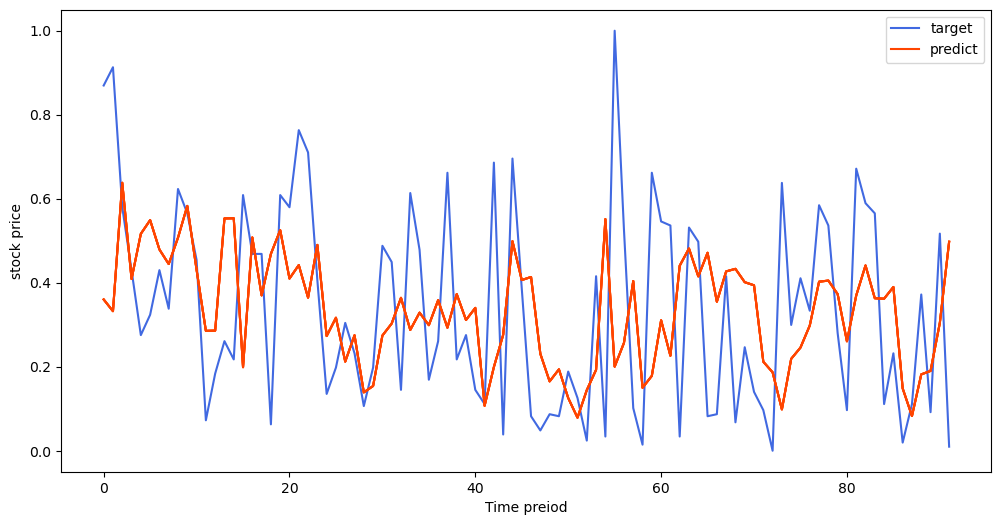

RMSE: 0.2516469545751108
MAE: 0.19992476156732888
R-squared: -0.09047162197095382


In [ ]:
import os # LSTM layer 갯수 조절 - 6개 / 200번 러닝 / 뉴런 128개 / dense 4
os.environ['KMP_DUPLICATE_LIB_OK']='True'
plt.figure(figsize=(12, 6))  # 그래프 크기 조정
plt.plot(testY,'#4169E1')
plt.plot(test_predict,'#FF4500')
plt.xlabel('Time preiod')
plt.ylabel('stock price')
plt.legend(['target','predict'])
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 예측 성능 평가
rmse = np.sqrt(mean_squared_error(testY, test_predict[:, 1]))  # 수정된 부분
mae = mean_absolute_error(testY, test_predict[:, 1])  # 수정된 부분
r2 = r2_score(testY, test_predict[:, 1])  # 수정된 부분

# 결과 출력
print('RMSE:', rmse)
print('MAE:', mae)
print('R-squared:', r2)

* input data를 조절하지 않고 layer들을 조절해본 조건 중 가장 좋은 추세를 보였다

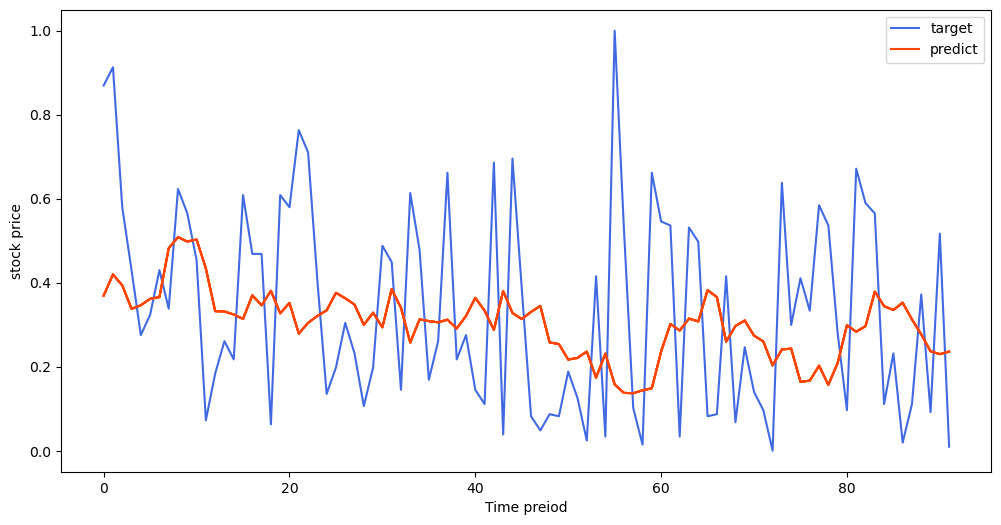

RMSE: 0.2536648285933843
MAE: 0.2135624864375857
R-squared: -0.108030003604626


In [ ]:
import os # LSTM layer 갯수 조절 - 6개 / 200번 러닝 / 뉴런 256개 / dense 4
os.environ['KMP_DUPLICATE_LIB_OK']='True'
plt.figure(figsize=(12, 6))  # 그래프 크기 조정
plt.plot(testY,'#4169E1')
plt.plot(test_predict,'#FF4500')
plt.xlabel('Time preiod')
plt.ylabel('stock price')
plt.legend(['target','predict'])
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 예측 성능 평가
rmse = np.sqrt(mean_squared_error(testY, test_predict[:, 1]))  # 수정된 부분
mae = mean_absolute_error(testY, test_predict[:, 1])  # 수정된 부분
r2 = r2_score(testY, test_predict[:, 1])  # 수정된 부분

# 결과 출력
print('RMSE:', rmse)
print('MAE:', mae)
print('R-squared:', r2)

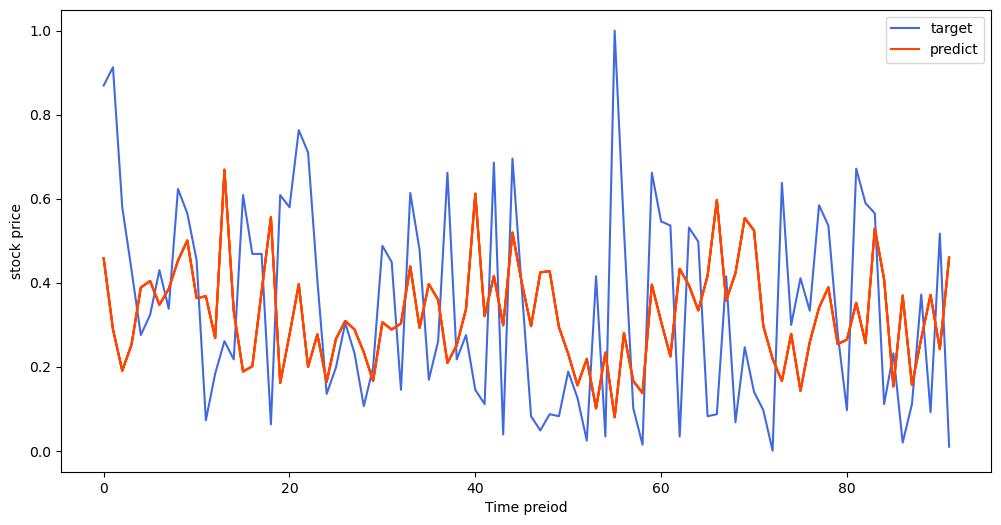

RMSE: 0.2777509465791928
MAE: 0.22593974897246258
R-squared: -0.3284404946129358


In [ ]:
import os # LSTM layer 갯수 조절 - 7개 / 200번 러닝 / 뉴런 128개 / dense 4
os.environ['KMP_DUPLICATE_LIB_OK']='True'
plt.figure(figsize=(12, 6))  # 그래프 크기 조정
plt.plot(testY,'#4169E1')
plt.plot(test_predict,'#FF4500')
plt.xlabel('Time preiod')
plt.ylabel('stock price')
plt.legend(['target','predict'])
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 예측 성능 평가
rmse = np.sqrt(mean_squared_error(testY, test_predict[:, 1]))  # 수정된 부분
mae = mean_absolute_error(testY, test_predict[:, 1])  # 수정된 부분
r2 = r2_score(testY, test_predict[:, 1])  # 수정된 부분

# 결과 출력
print('RMSE:', rmse)
print('MAE:', mae)
print('R-squared:', r2)

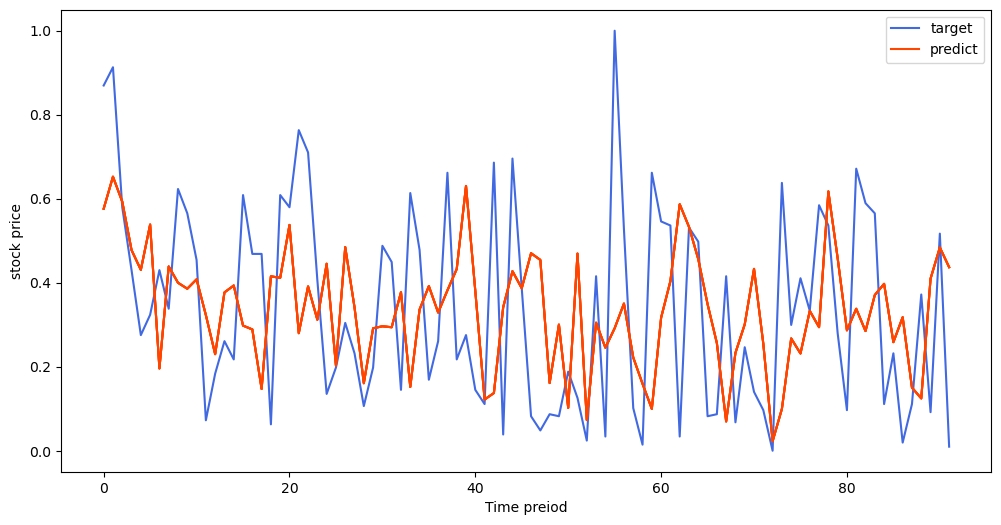

RMSE: 0.25475627272291373
MAE: 0.20794269706569085
R-squared: -0.11758556234613216


In [ ]:
import os # LSTM layer 갯수 조절 - 5개 / 200번 러닝 / 뉴런 128개 / dense 4
os.environ['KMP_DUPLICATE_LIB_OK']='True'
plt.figure(figsize=(12, 6))  # 그래프 크기 조정
plt.plot(testY,'#4169E1')
plt.plot(test_predict,'#FF4500')
plt.xlabel('Time preiod')
plt.ylabel('stock price')
plt.legend(['target','predict'])
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 예측 성능 평가
rmse = np.sqrt(mean_squared_error(testY, test_predict[:, 1]))  # 수정된 부분
mae = mean_absolute_error(testY, test_predict[:, 1])  # 수정된 부분
r2 = r2_score(testY, test_predict[:, 1])  # 수정된 부분

# 결과 출력
print('RMSE:', rmse)
print('MAE:', mae)
print('R-squared:', r2)

* 200번의 러닝 조건에서 LSTM layer와 Dense  및 뉴런 수의 변화에 따른 오존 예측치 추이 변화를 관찰한 결과 LSTM layer 6개 Dense 4개 뉴런수 128개에서 실제 값과 가장 가까운 예측치를 얻었습니다. 그러나 아직 충분히 예측치로써의 가치가 있기에 부족해 보이므로 새로운 feature를 추가하거나 알고리즘의 변화 입력 데이터의 전처리를 통해 더 다듬어 볼 필요성이 있어보입니다.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 예측 성능 평가
rmse = np.sqrt(mean_squared_error(testY, test_predict))
mae = mean_absolute_error(testY, test_predict)
r2 = r2_score(testY, test_predict)

# 결과 출력
print('RMSE:', rmse)
print('MAE:', mae)
print('R-squared:', r2)

RMSE: 0.26135027082413514
MAE: 0.2179382147006815
R-squared: -0.17618847388496794


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(testY, test_predict)
print("Mean Squared Error:", mse)



Mean Squared Error: 0.0752762239767037


In [ ]:
#7월6일~10일까지의 오존데이터로 11일 데이터 예측하기
pre_o3 = model.predict(np.array([[[0.051],[0.042],[0.043],[0.055],[0.040]]]))
pre_o3

pre_o3 = pre_o3 * (np.max(df,axis=0) -np.min(df, axis=0)) +np.min(df, axis=0)
if pre_o3 <= 0.030:
    print("평가: 좋음", pre_o3)
elif pre_o3 <= 0.090:
    print("평가: 보통")
elif pre_o3 <= 0.150:
    print("평가: 나쁨")
else:
    print("평가: 매우나쁨")


InvalidArgumentError: Graph execution error:

Specified a list with shape [?,6] from a tensor with shape [1,1]
	 [[{{node TensorArrayUnstack/TensorListFromTensor}}]]
	 [[sequential/lstm/PartitionedCall]] [Op:__inference_predict_function_117517]